In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
# import the data
x1 = pd.read_csv('HW4 Data/p2/x1.csv')
x2 = pd.read_csv('HW4 Data/p2/x2.csv')
x3 = pd.read_csv('HW4 Data/p2/x3.csv')

y1 = pd.read_csv('HW4 Data/p2/c1.csv')
y2 = pd.read_csv('HW4 Data/p2/c2.csv')
y3 = pd.read_csv('HW4 Data/p2/c3.csv')

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: U

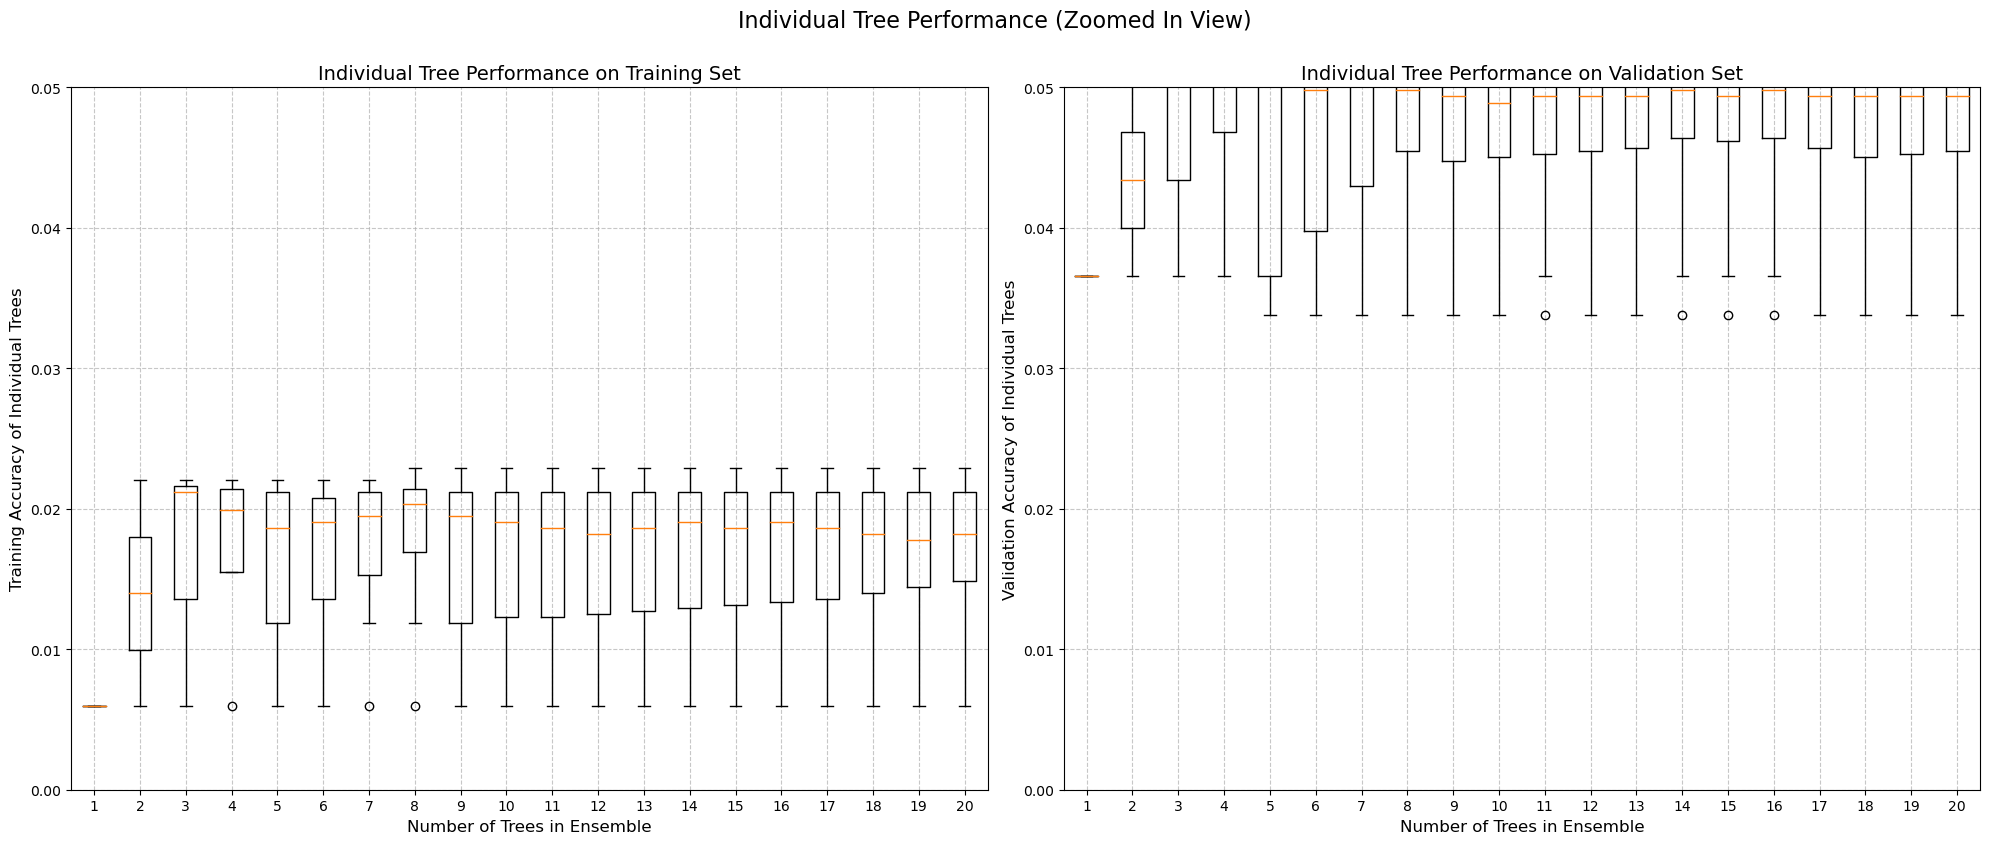

In [19]:
# Initialize lists to store results for the training and validation sets
train_accuracies_per_tree = []
val_accuracies_per_tree = []

# Define n_trees_list if not already defined
if 'n_trees_list' not in locals():
    n_trees_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Convert y2 to numpy array for evaluation
y2_values = y2.values.ravel()

# Train models with different numbers of trees and track performance
for n_trees in n_trees_list:
    # Train a bagged tree model
    bagged_tree = BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=n_trees,
        random_state=42
    )
    bagged_tree.fit(x1, y1_values)
    
    # Store the individual estimator accuracies for training set
    train_acc_per_model = []
    
    # Store the individual estimator accuracies for validation set
    val_acc_per_model = []
    
    for estimator in bagged_tree.estimators_:
        # Predictions for individual trees on training set
        train_pred_single = estimator.predict(x1)
        
        # Predictions for individual trees on validation set
        val_pred_single = estimator.predict(x2)
        
        # Accuracy for individual trees on training set
        train_acc_single = accuracy_score(y1_values, train_pred_single)
        
        # Accuracy for individual trees on validation set
        val_acc_single = accuracy_score(y2_values, val_pred_single)
        
        train_acc_per_model.append(train_acc_single)
        val_acc_per_model.append(val_acc_single)
    
    train_accuracies_per_tree.append(train_acc_per_model)
    val_accuracies_per_tree.append(val_acc_per_model)

# Create box plots for individual tree performances on both training and validation sets
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Zooming in on the data by setting a more appropriate y-axis range
y_min = 0.0
y_max = 0.05  # Setting a reasonable upper limit based on your data

# Training set box plot
bp1 = axes[0].boxplot(train_accuracies_per_tree, labels=n_trees_list)
axes[0].set_xlabel('Number of Trees in Ensemble', fontsize=12)
axes[0].set_ylabel('Training Accuracy of Individual Trees', fontsize=12)
axes[0].set_title('Individual Tree Performance on Training Set', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].tick_params(axis='both', labelsize=10)
axes[0].set_ylim([y_min, y_max])  # Zoomed in y-axis

# Validation set box plot
bp2 = axes[1].boxplot(val_accuracies_per_tree, labels=n_trees_list)
axes[1].set_xlabel('Number of Trees in Ensemble', fontsize=12)
axes[1].set_ylabel('Validation Accuracy of Individual Trees', fontsize=12)
axes[1].set_title('Individual Tree Performance on Validation Set', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].tick_params(axis='both', labelsize=10)
axes[1].set_ylim([y_min, y_max])  # Zoomed in y-axis

# Add a tight layout to ensure proper spacing
plt.tight_layout()

# Add a suptitle
plt.suptitle('Individual Tree Performance (Zoomed In View)', fontsize=16, y=1.05)

plt.show()


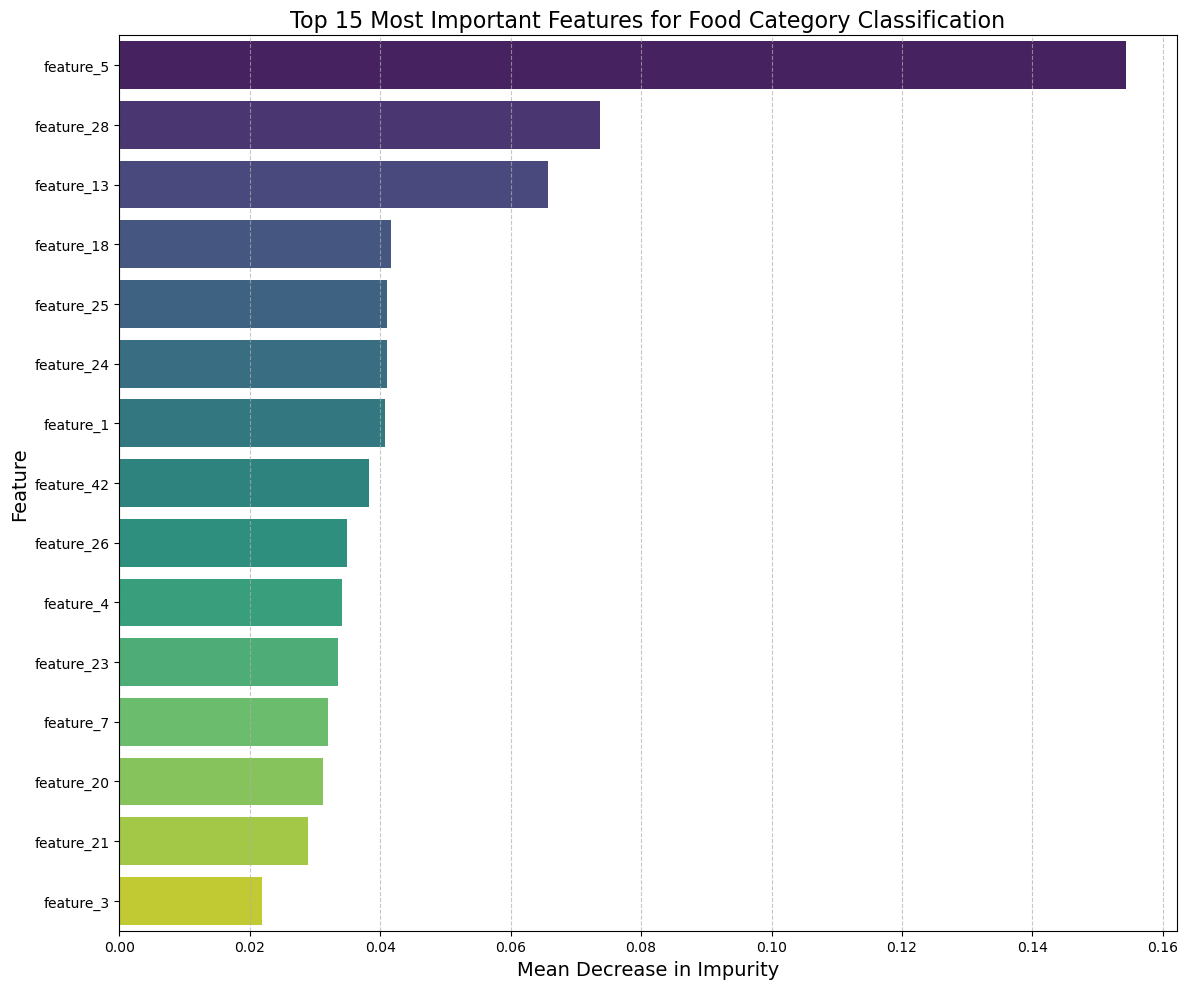

Top 15 Features by Importance:
       Feature  Importance
5    feature_5    0.154388
28  feature_28    0.073767
13  feature_13    0.065792
18  feature_18    0.041662
25  feature_25    0.041078
24  feature_24    0.040963
1    feature_1    0.040766
42  feature_42    0.038240
26  feature_26    0.034884
4    feature_4    0.034178
23  feature_23    0.033561
7    feature_7    0.031991
20  feature_20    0.031244
21  feature_21    0.028979
3    feature_3    0.021920


In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np

import matplotlib.pyplot as plt

# Define a list of tree counts if not already defined
if 'n_trees_list' not in locals():
    n_trees_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Train the model with the best number of trees (20 from the previous results)
best_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=20,
    random_state=42
)
best_model.fit(x1, y1_values)

# Calculate feature importance using mean decrease in impurity
feature_importances = np.zeros(x1.shape[1])
for tree in best_model.estimators_:
    feature_importances += tree.feature_importances_
feature_importances /= len(best_model.estimators_)

# Create DataFrame for easier manipulation
feature_importance_df = pd.DataFrame({
    'Feature': [f'feature_{i}' for i in range(x1.shape[1])],
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the top 15 most important features
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Top 15 Most Important Features for Food Category Classification', fontsize=16)
plt.xlabel('Mean Decrease in Impurity', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the importance values for reference
print("Top 15 Features by Importance:")
print(feature_importance_df.head(15))


# what are the labels of the features?
# 1 Baked Products
# 2 Vegetables and Vegetable Products
# 3 Soups, Sauces, and Gravies
# 4 Sweets
# 5 Fast Foods
# 6 Fruits and Fruit Juices
# 7 Breakfast Cereals
# 8 Poultry Products
# 9 Beef Products
# 10 Lamb, Veal, and Game Products

# feature 5: ash
# feature 28: Folate
# feature 13: Potassium 
# feature 18: Selenium
# feature 25: Total Folate
# feature 24: Vitamin  B6
# feature 1: Water
# feature 42: Polyunsaturated Fatty acids
# feature 26: Folic Acid
# feature 4: Total Lipids (Fats)
# feature 23: Panthothenic Acid
# feature 7: Total Dietary Fiber
# feature 20: Thiamin 
# feature 21: Riboflavin
# feature 3: Protein
